In [1]:
import randf_model as model
import pandas as pd
import numpy as np

In [2]:
# Example usage
audio_directory = 'TAUKADIAL-24/train/'  # Replace with your actual directory path
all_audio_features = model.process_audio_directory(audio_directory)

### Load the processed data and Ground truth data into a dataframe

In [3]:
df1 = pd.DataFrame(all_audio_features)
df1.rename(columns={0: 'tkdname', 1: 'mfccs', 2: 'chroma', 3: 'spectral_contrast', 4: 'spectral_rolloff', 5: 'zero_crossing_rate', 6: 'rmse'}, inplace=True)

df2 = pd.read_csv('TAUKADIAL-24/train/groundtruth.csv')

df = pd.merge(df1, df2, on='tkdname')
df.to_csv('TAUKADIAL-24.csv')

In [4]:
df.head()

,tkdname,mfccs,chroma,spectral_contrast,spectral_rolloff,zero_crossing_rate,rmse,age,sex,mmse,dx
0,taukdial-109-1.wav,"[-430.41904, 130.43205, 27.022755, 36.2068, -0...","[0.53060824, 0.49707878, 0.43993297, 0.3798646...","[20.284155622319712, 15.687091974219621, 18.90...",1871.617482,0.042134,0.027124,72,M,28,MCI
1,taukdial-053-3.wav,"[-471.56644, 95.3816, 42.543037, 24.282658, -3...","[0.5325664, 0.44339445, 0.46366897, 0.4762177,...","[21.536564255700505, 13.138538271322721, 15.82...",2898.405117,0.061045,0.026718,73,M,27,MCI
2,taukdial-051-1.wav,"[-388.53183, 141.86292, 35.581978, 21.184015, ...","[0.5623833, 0.45743582, 0.37826404, 0.36843395...","[15.9616963024241, 13.506451266528362, 16.3445...",1671.243210,0.043425,0.037746,64,M,26,MCI
3,taukdial-014-1.wav,"[-295.61603, 90.61048, -25.255726, 37.26282, -...","[0.29368737, 0.26871374, 0.28498656, 0.3593897...","[23.46122979051979, 16.569796770530886, 19.340...",3568.824647,0.123242,0.066808,65,F,29,MCI
4,taukdial-032-2.wav,"[-400.74396, 86.06941, -17.47101, 24.062902, 1...","[0.46204045, 0.44497553, 0.41617158, 0.3602271...","[21.921714577214733, 15.83048484958038, 19.301...",3210.400251,0.084233,0.030681,76,M,27,MCI


In [5]:
data = df.copy()
data.drop(columns=['tkdname'], inplace=True)
data['mfccs'] = data['mfccs'].apply(lambda x: np.mean(x))
data['chroma'] = data['chroma'].apply(lambda x: np.mean(x))
data['spectral_contrast'] = data['spectral_contrast'].apply(lambda x: np.mean(x))


data['sex'] = data['sex'].map({'M': 1, 'F': 0})

data.drop_duplicates(inplace=True)
data.groupby('dx').describe()

mfccs                                                                   \
     count       mean       std        min        25%        50%        75%   
dx                                                                            
MCI  222.0 -21.843630  6.439664 -38.183739 -26.135658 -22.726085 -19.131562   
NC   165.0 -24.106544  6.603694 -38.629704 -28.494347 -24.944582 -21.530870   

              chroma            ...  sex        mmse                       \
          max  count      mean  ...  75%  max  count       mean       std   
dx                              ...                                         
MCI -4.704826  222.0  0.409325  ...  1.0  1.0  222.0  25.837838  3.732069   
NC  -8.103128  165.0  0.392216  ...  1.0  1.0  165.0  29.072727  1.079542   

                                   
      min   25%   50%   75%   max  
dx                                 
MCI  13.0  25.0  27.0  28.0  30.0  
NC   25.0  29.0  29.0  30.0  30.0  

[2 rows x 72 columns]

### Train the model

In [6]:
# Define features and target
features = ['mfccs', 'chroma', 'spectral_contrast', 'spectral_rolloff', 'zero_crossing_rate', 'rmse', 'age', 'sex', 'mmse']
target = 'dx'

# Train the model
trained_model, test_features, test_target = model.train_model(data, features, target)

### Evaluate the model

In [7]:
# Test the model
ypred, ytest, report = model.test_model(trained_model, test_features, test_target)

Actual vs. Predicted:
NC NC
MCI MCI
MCI MCI
NC NC
MCI MCI
NC NC
MCI MCI
NC MCI
MCI MCI
NC NC
MCI MCI
MCI MCI
MCI MCI
MCI MCI
MCI MCI
NC NC
MCI MCI
MCI MCI
NC NC
NC MCI
MCI MCI
NC NC
MCI NC
MCI MCI
NC NC
NC NC
NC NC
MCI MCI
NC NC
MCI MCI
MCI MCI
MCI MCI
NC NC
MCI MCI
MCI MCI
NC MCI
MCI MCI
NC NC
MCI MCI
MCI MCI
NC NC
NC NC
NC NC
NC NC
NC NC
MCI MCI
MCI MCI
MCI MCI
NC NC
NC NC
MCI MCI
NC NC
MCI MCI
NC NC
MCI MCI
NC NC
MCI MCI
MCI MCI
MCI MCI
MCI MCI
NC MCI
MCI MCI
MCI MCI
NC NC
NC NC
NC NC
NC NC
NC NC
NC NC
MCI MCI
MCI MCI
MCI MCI
MCI NC
MCI MCI
MCI MCI
NC NC
MCI MCI
NC NC
Accuracy: 0.9230769230769231


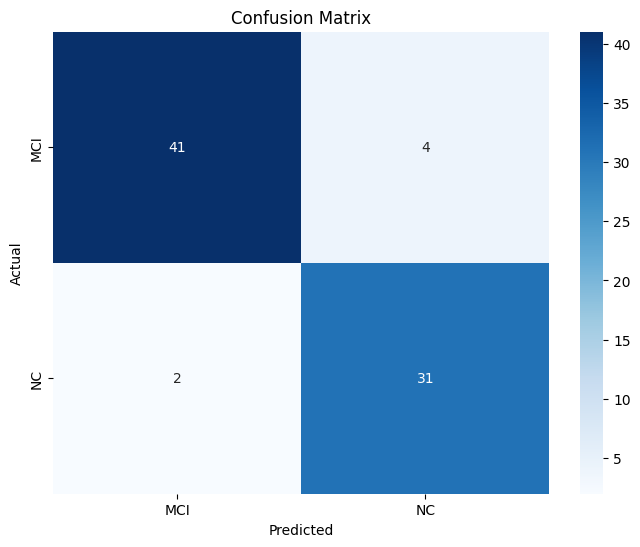

In [8]:
target_labels = ['MCI','NC']
model.plot_confusion_matrix(ytest, ypred,target_labels)

[('num', SimpleImputer(), ['mfccs', 'chroma', 'spectral_contrast', 'spectral_rolloff', 'zero_crossing_rate', 'rmse', 'age', 'sex', 'mmse'])]
[8 2 3 1 6 0 5 4 7]


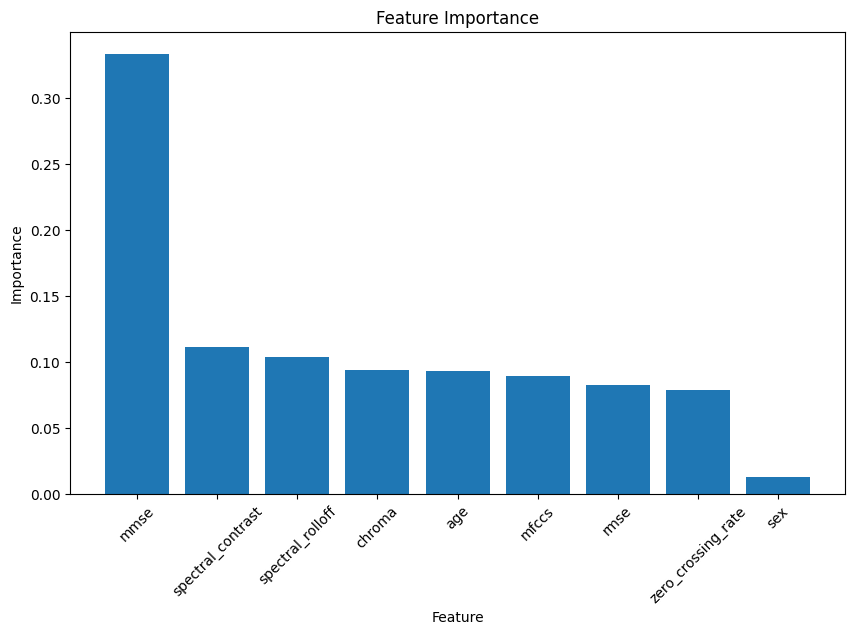

In [9]:
import matplotlib.pyplot as plt

features = ['mfccs', 'chroma', 'spectral_contrast', 'spectral_rolloff', 'zero_crossing_rate', 'rmse', 'age', 'sex', 'mmse']
preprocessor = trained_model.named_steps['preprocessor']
print(preprocessor.transformers_)


importances = trained_model.named_steps['classifier'].feature_importances_


indices = np.argsort(importances)[::-1]
print(indices)
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [10]:
report

'              precision    recall  f1-score   support\n\n         MCI       0.91      0.95      0.93        43\n          NC       0.94      0.89      0.91        35\n\n    accuracy                           0.92        78\n   macro avg       0.93      0.92      0.92        78\nweighted avg       0.92      0.92      0.92        78\n'